In [1]:
!python3 -m pip install mysqlclient --user

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
myvars = {}
with open("aanebu-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [4]:
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [5]:
import MySQLdb
import pandas as pd
conn = MySQLdb.connect(host='localhost', user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp22grp08_db')
cursor = conn.cursor()
conn

<_mysql.connection open to 'localhost' at 0x27c8380>

In [6]:
dfmain = pd.read_csv('myocardialinfarction.csv')
dfmain.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dfcleaned = dfmain.filter(['AGE', 'SEX', 'SIM_GIPERT', 'endocr_01', 'endocr_02', 'endocr_03', 
                  'zab_leg_03', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'TIME_B_S', 'ZSN'])
dfcleaned.head()

,AGE,SEX,SIM_GIPERT,endocr_01,endocr_02,endocr_03,zab_leg_03,R_AB_1_n,R_AB_2_n,R_AB_3_n,TIME_B_S,ZSN
0,77.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0
1,55.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,52.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0
3,68.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1
4,60.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0


In [8]:
dfcleaned.to_csv('MI_CHD.csv')

# DEVELOP CONNECTION BETWEEN mySQL AND PYTHON

In [9]:
# import sqlite database package
import sqlite3
# create database
conn = sqlite3.connect('dfcleaned.db')
print("Database opened...");
# create table
conn.execute('''
CREATE TABLE IF NOT EXISTS dfcleaned(AGE float, 
SEX int, SIM_GIPERT text, endocr_01 text, endocr_02 text, endocr_03 text, 
zab_leg_03 text, R_AB_1_n text, R_AB_2_n text, R_AB_3_n text,  
TIME_B_S text, ZSN text);''')
conn.commit()
print("Table created");
conn.close()

Database opened...
Table created


In [10]:
conn = sqlite3.connect('dfcleaned.db')
myocardial_infarction_data = pd.read_sql('''SELECT * FROM dfcleaned''', conn)
age_null = pd.read_sql('''SELECT COUNT(*) AS missing 
FROM dfcleaned WHERE AGE IS NULL''', conn)
time_null = pd.read_sql('''SELECT COUNT(*) AS missing 
FROM dfcleaned WHERE TIME_B_S IS NULL''', conn)
endocr_01 = pd.read_sql('''SELECT COUNT(*) AS missing 
FROM dfcleaned WHERE endocr_01 IS NULL''', conn)
zab_leg = pd.read_sql('''SELECT COUNT(*) AS missing 
FROM dfcleaned WHERE zab_leg_03 IS NULL''', conn)
R_AB_1_n = pd.read_sql('''SELECT COUNT(*) AS missing 
FROM dfcleaned WHERE R_AB_1_n IS NULL''', conn)
#print("Data seved to database")
conn.commit()
conn.close()
print(myocardial_infarction_data)
# print total null values
print('Sum of empty fields in age:', age_null)
print('Sum of empty fields in time:', time_null)
print('Sum of empty fields in endocr_01:', endocr_01)
print('Sum of empty fields in zab_leg_03:', zab_leg)
print('Sum of empty fields in R_AB_1_n:', R_AB_1_n)

       AGE  SEX SIM_GIPERT endocr_01 endocr_02 endocr_03 zab_leg_03 R_AB_1_n  \
0     77.0    1        0.0       0.0       0.0       0.0        0.0      0.0   
1     55.0    1        0.0       0.0       0.0       0.0        0.0      0.0   
2     52.0    1        0.0       0.0       0.0       0.0        0.0      3.0   
3     68.0    0        0.0       0.0       0.0       0.0        0.0      0.0   
4     60.0    1        0.0       0.0       0.0       0.0        0.0      0.0   
...    ...  ...        ...       ...       ...       ...        ...      ...   
3395  77.0    0        0.0       0.0       0.0       0.0        0.0      0.0   
3396  70.0    0        0.0       0.0       0.0       0.0        0.0      0.0   
3397  55.0    1        0.0       0.0       0.0       0.0        0.0      2.0   
3398  79.0    0        0.0       0.0       0.0       0.0        0.0      1.0   
3399  63.0    1        0.0       0.0       0.0       0.0        0.0      0.0   

     R_AB_2_n R_AB_3_n TIME_B_S ZSN  
0

# DATA CLEANING

In [11]:
# checking for dublicates
print(dfcleaned.duplicated())
# remove duplicated
dfcleaned.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1695     True
1696     True
1697    False
1698    False
1699    False
Length: 1700, dtype: bool


,AGE,SEX,SIM_GIPERT,endocr_01,endocr_02,endocr_03,zab_leg_03,R_AB_1_n,R_AB_2_n,R_AB_3_n,TIME_B_S,ZSN
0,77.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0
1,55.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,52.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0
3,68.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1
4,60.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1693,70.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0
1694,77.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
1697,55.0,1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0
1698,79.0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,2.0,0


In [12]:
df = dfcleaned.copy()
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['SIM_GIPERT'] = df['SIM_GIPERT'].fillna(df['SIM_GIPERT'].mode()[0])
df['endocr_01'] = df['endocr_01'].fillna(df['endocr_01'].mode()[0])
df['endocr_02'] = df['endocr_02'].fillna(df['endocr_02'].mode()[0])
df['endocr_03'] = df['endocr_03'].fillna(df['endocr_03'].mode()[0])
df['zab_leg_03'] = df['zab_leg_03'].fillna(df['zab_leg_03'].mode()[0])
df['R_AB_1_n'] = df['R_AB_1_n'].fillna(df['R_AB_1_n'].mode()[0])
df['R_AB_2_n'] = df['R_AB_2_n'].fillna(df['R_AB_2_n'].mode()[0])
df['R_AB_3_n'] = df['R_AB_3_n'].fillna(df['R_AB_3_n'].mode()[0])
df['TIME_B_S'] = df['TIME_B_S'].fillna(df['TIME_B_S'].mode()[0])

In [13]:
df.isnull().sum()

AGE           0
SEX           0
SIM_GIPERT    0
endocr_01     0
endocr_02     0
endocr_03     0
zab_leg_03    0
R_AB_1_n      0
R_AB_2_n      0
R_AB_3_n      0
TIME_B_S      0
ZSN           0
dtype: int64

In [14]:
df

,AGE,SEX,SIM_GIPERT,endocr_01,endocr_02,endocr_03,zab_leg_03,R_AB_1_n,R_AB_2_n,R_AB_3_n,TIME_B_S,ZSN
0,77.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0
1,55.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,52.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0
3,68.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1
4,60.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1696,70.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1697,55.0,1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0
1698,79.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0


# NORMALITY TESTS

In [15]:
from scipy.stats import normaltest

df_nom = df.copy()
# convert to numerical
df_nom = df_nom.astype('category')

wd_column = df_nom.select_dtypes(['category']).columns
df_nom[wd_column] = df_nom[wd_column].apply(lambda x: x.cat.codes)
print(df_nom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   AGE         1700 non-null   int8 
 1   SEX         1700 non-null   int8 
 2   SIM_GIPERT  1700 non-null   int8 
 3   endocr_01   1700 non-null   int8 
 4   endocr_02   1700 non-null   int8 
 5   endocr_03   1700 non-null   int8 
 6   zab_leg_03  1700 non-null   int8 
 7   R_AB_1_n    1700 non-null   int8 
 8   R_AB_2_n    1700 non-null   int8 
 9   R_AB_3_n    1700 non-null   int8 
 10  TIME_B_S    1700 non-null   int8 
 11  ZSN         1700 non-null   int8 
dtypes: int8(12)
memory usage: 20.0 KB
None


In [16]:
# normality test
from scipy.stats import normaltest

stat, p = normaltest(df_nom)
print('Statistics = %.3f, p = %.3f' % (stat.all(), p.all()))
# interpret results
alpha = 0.05
if p.all() > alpha:
    print('CHD data looks Gaussian (fail to reject H0)')
else:
    print('CHD data does not look Gaussian (reject H0)')

Statistics = 1.000, p = 0.000
CHD data does not look Gaussian (reject H0)


In [17]:
# using the shapiro package

from scipy.stats import shapiro
# normality test
stat, p = shapiro(df_nom)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.369, p=0.000
Sample does not look Gaussian (reject H0)


# STATISTICAL TESTS

In [18]:
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import pandas as pd
from scipy.stats import pointbiserialr
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df.to_csv('df.csv', encoding='utf-8')

In [20]:
print(stats.pearsonr(df['ZSN'], df['R_AB_1_n']))
print(stats.spearmanr(df['ZSN'], df['R_AB_1_n']))
print(stats.kendalltau(df['ZSN'], df['R_AB_1_n']))

(0.03908835027446642, 0.10716136580762094)
SpearmanrResult(correlation=0.057832186264899756, pvalue=0.01709192755843108)
KendalltauResult(correlation=0.05648394839712572, pvalue=0.017135810302574276)


# POINT BISERIAL CORRELATION

In [21]:
# get data
data = pd.read_csv('df.csv')

# get continuous and dichotomous data
CHD = data['ZSN']
TIME = data['R_AB_1_n']

# pbc of first question
pbc = pointbiserialr(TIME, CHD)
print(pbc)

PointbiserialrResult(correlation=0.03908835027446642, pvalue=0.10716136580762094)


In [22]:
# get data
data = pd.read_csv('df.csv')

# get continuous and dichotomous data
CHD = data['ZSN']
TIME = data['R_AB_2_n']

# pbc of first question
pbc = pointbiserialr(TIME, CHD)
print(pbc)

PointbiserialrResult(correlation=0.06120047804225879, pvalue=0.011607074242966104)


In [23]:
# get data
data = pd.read_csv('df.csv')

# get continuous and dichotomous data
CHD = data['ZSN']
TIME = data['R_AB_3_n']

# pbc of first question
pbc = pointbiserialr(TIME, CHD)
print(pbc)

PointbiserialrResult(correlation=0.08637963540368981, pvalue=0.00036306639535585954)


In [24]:
df.corr(method= 'spearman')

,AGE,SEX,SIM_GIPERT,endocr_01,endocr_02,endocr_03,zab_leg_03,R_AB_1_n,R_AB_2_n,R_AB_3_n,TIME_B_S,ZSN
AGE,1.000000,-0.404552,-0.024671,0.147178,0.021824,0.030622,0.071985,0.010766,0.017781,0.045639,-0.032995,0.143553
SEX,-0.404552,1.000000,-0.065584,-0.259901,-0.104281,-0.099726,-0.009829,-0.031709,-0.004226,-0.063351,0.009018,-0.097490
SIM_GIPERT,-0.024671,-0.065584,1.000000,0.080119,0.096662,-0.016351,0.017007,-0.004195,-0.031379,0.021305,0.007975,-0.001631
endocr_01,0.147178,-0.259901,0.080119,1.000000,0.070803,-0.034548,-0.011385,0.026290,0.056064,0.045017,0.032116,0.127460
endocr_02,0.021824,-0.104281,0.096662,0.070803,1.000000,-0.013972,-0.023740,0.050944,-0.004938,-0.008967,-0.013517,0.029330
endocr_03,0.030622,-0.099726,-0.016351,-0.034548,-0.013972,1.000000,-0.013094,-0.015390,-0.008540,-0.022288,-0.013005,-0.016210
zab_leg_03,0.071985,-0.009829,0.017007,-0.011385,-0.023740,-0.013094,1.000000,0.030533,-0.050951,-0.003418,0.000760,0.023165
R_AB_1_n,0.010766,-0.031709,-0.004195,0.026290,0.050944,-0.015390,0.030533,1.000000,0.189397,0.151246,-0.101485,0.057832
R_AB_2_n,0.017781,-0.004226,-0.031379,0.056064,-0.004938,-0.008540,-0.050951,0.189397,1.000000,0.231892,-0.038732,0.055088
R_AB_3_n,0.045639,-0.063351,0.021305,0.045017,-0.008967,-0.022288,-0.003418,0.151246,0.231892,1.000000,-0.033868,0.088873


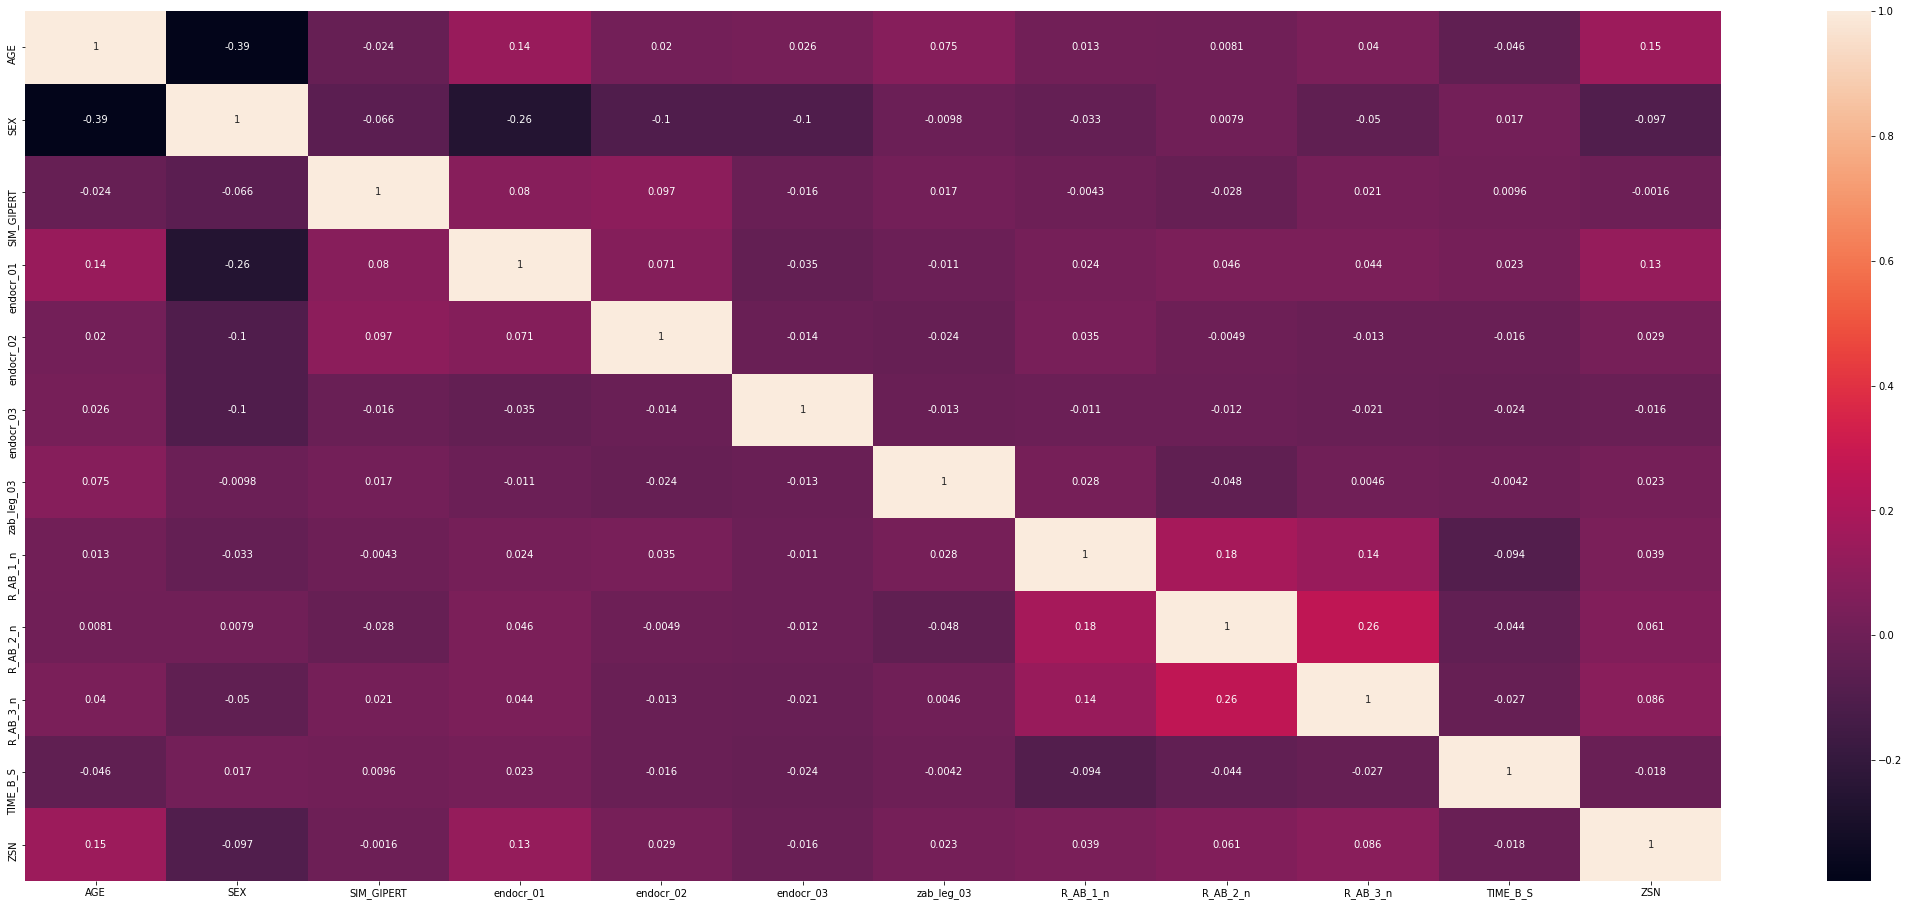

In [25]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

# DESCRIPTIVE STATISTICS

In [26]:
df.iloc[:, 1:8].describe()

,SEX,SIM_GIPERT,endocr_01,endocr_02,endocr_03,zab_leg_03,R_AB_1_n
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.626471,0.033529,0.134118,0.024706,0.007647,0.021765,0.312941
std,0.483883,0.180067,0.340879,0.155273,0.087138,0.145957,0.631485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [27]:
df.iloc[:, 8:].describe()

,R_AB_2_n,R_AB_3_n,TIME_B_S,ZSN
count,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.131765,0.071765,4.485294,0.231765
std,0.412064,0.302282,2.850672,0.422084
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000
75%,0.000000,0.000000,7.000000,0.000000
max,3.000000,3.000000,9.000000,1.000000


# DATA VISUALISATION

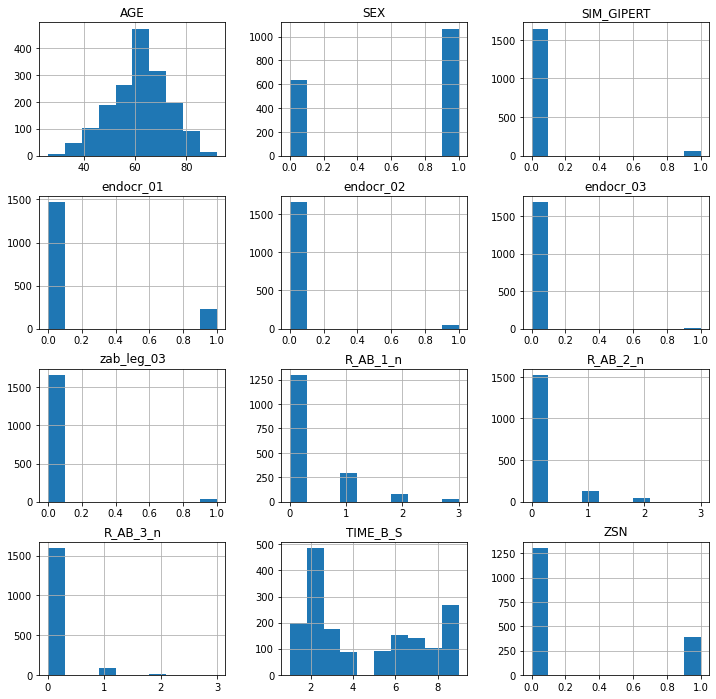

In [28]:
df.hist(figsize= [12,12])
plt.show()

Text(0, 0.5, 'SEX')

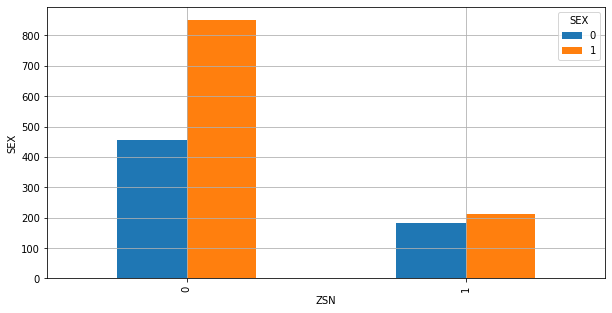

In [29]:
gender_CHD = pd.crosstab(index = df['ZSN'], columns = df['SEX'], values=df['TIME_B_S'], aggfunc=np.count_nonzero)
gender_CHD.plot(kind='bar', stacked=False, grid= True, figsize = (10,5))
plt.ylabel('SEX')

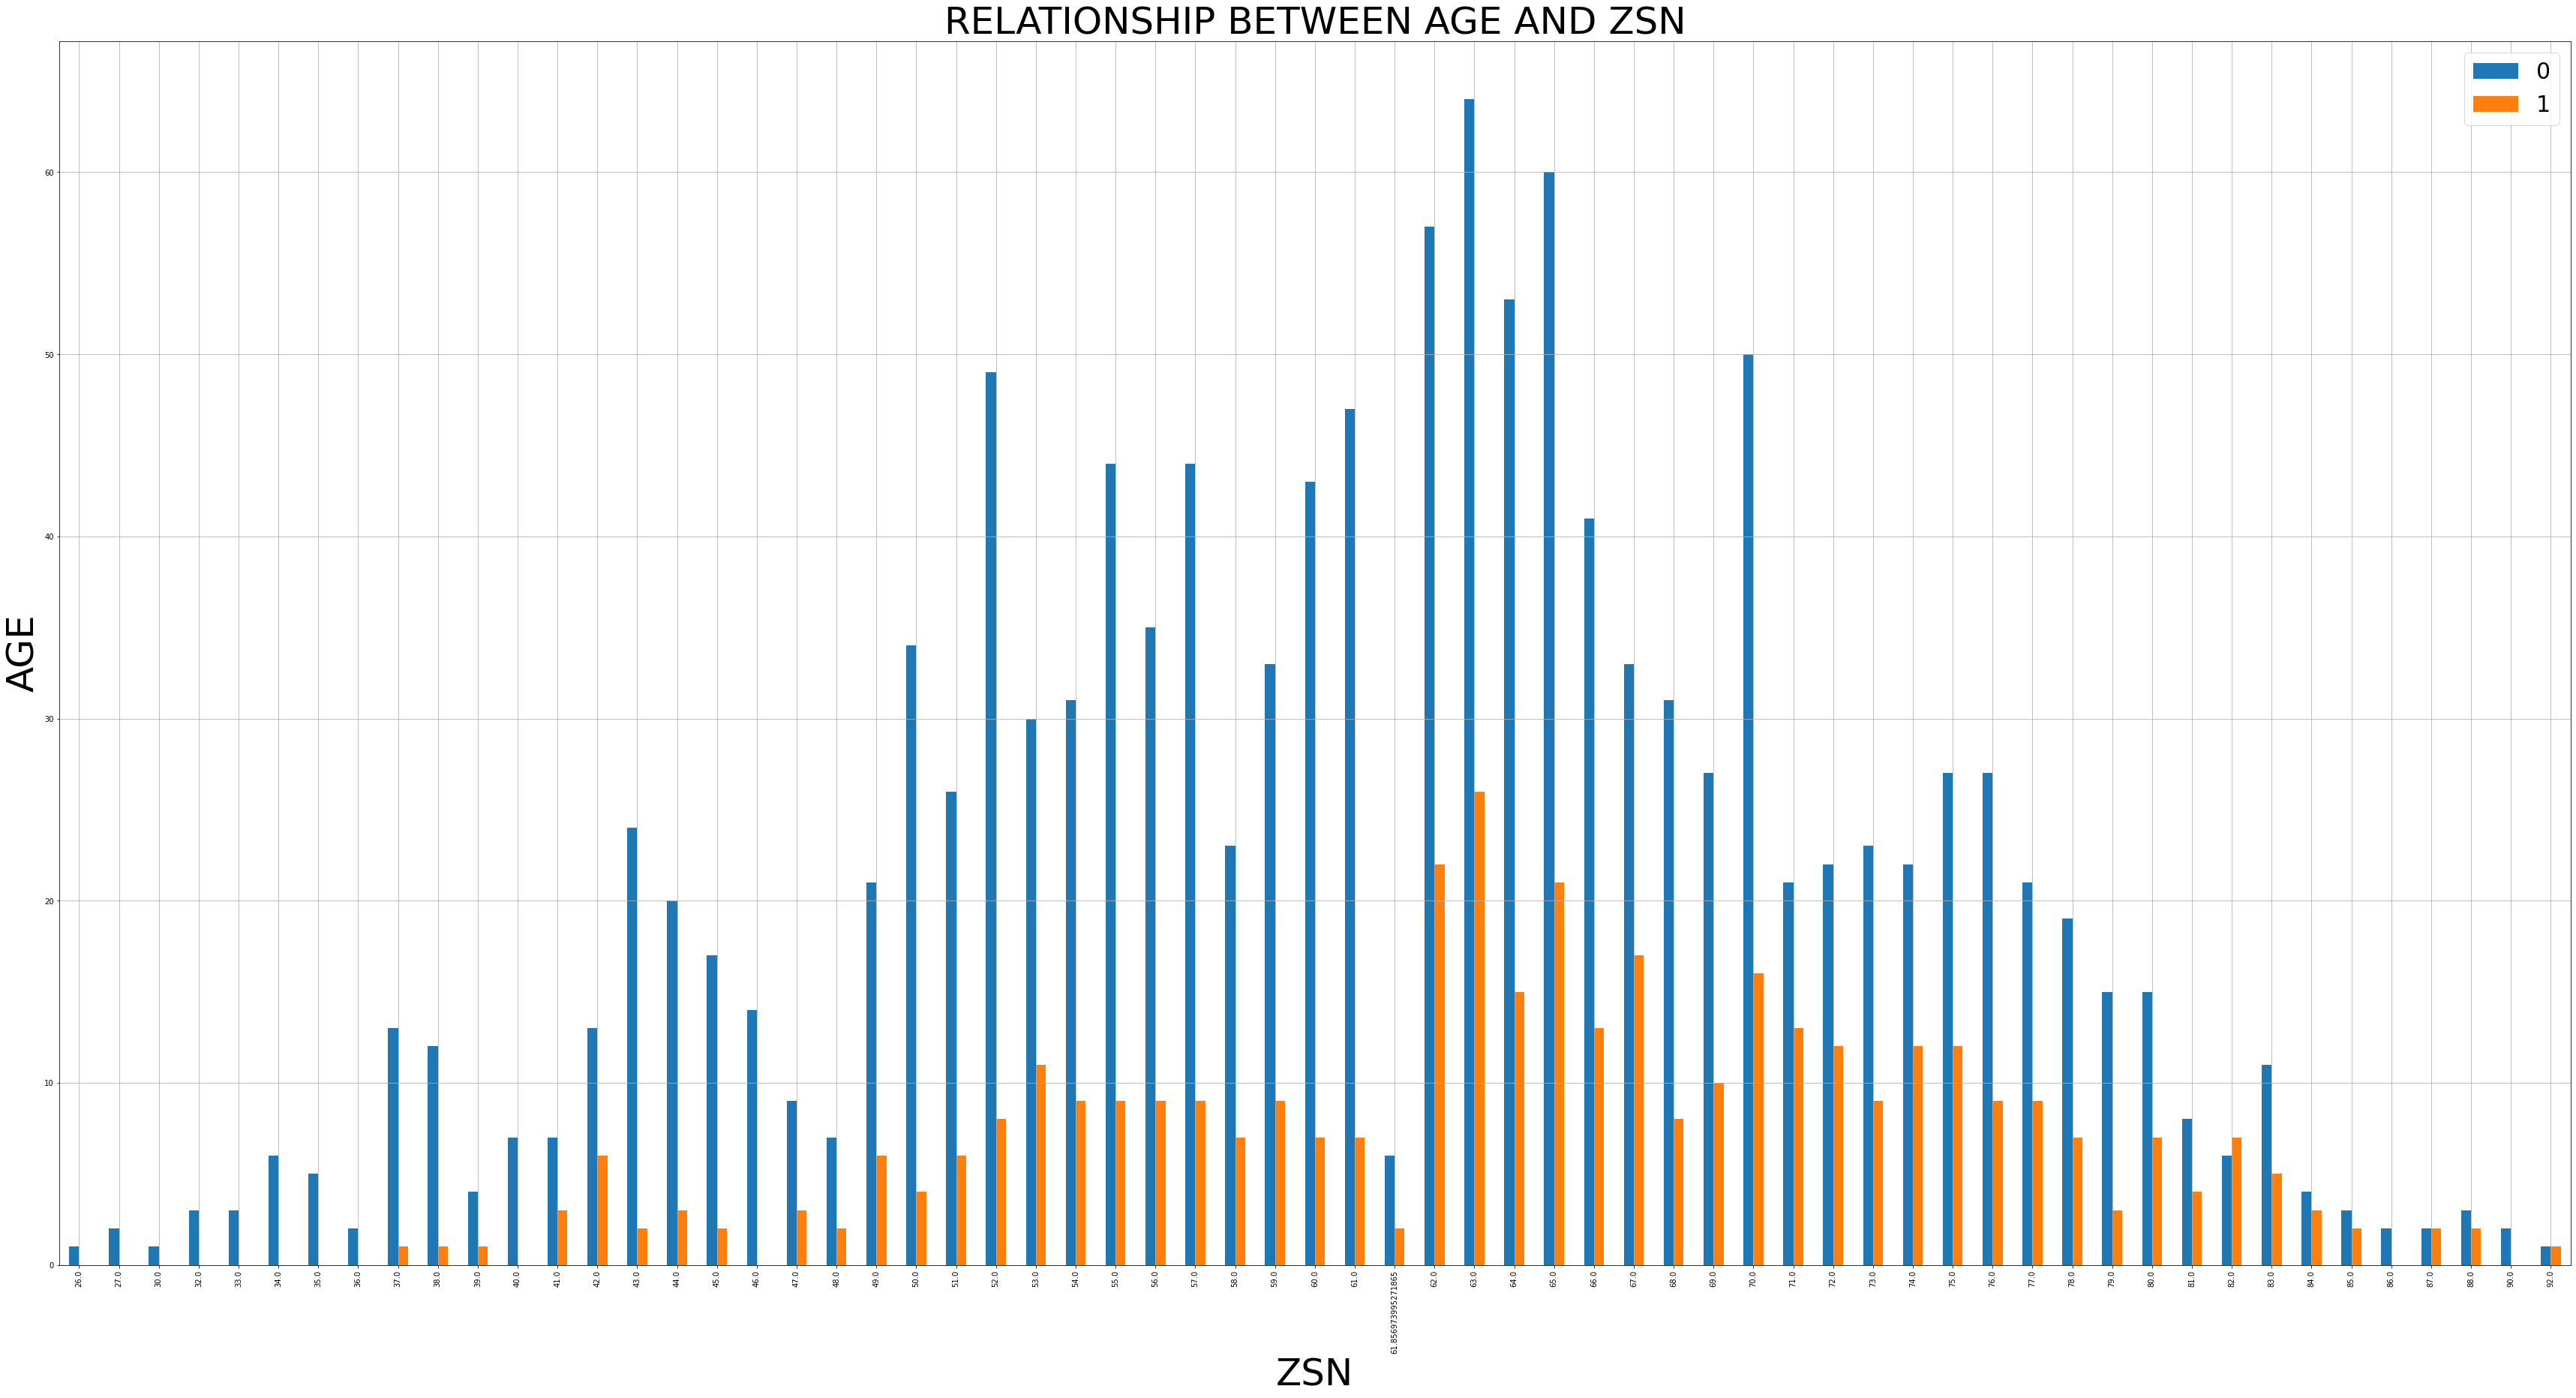

In [30]:
Age = pd.crosstab(index = df['AGE'], columns = df['ZSN'], values=df['TIME_B_S'], aggfunc=np.count_nonzero)
Age.plot(kind='bar', stacked=False,figsize=(60, 30), grid= True)
plt.title('RELATIONSHIP BETWEEN AGE AND ZSN', fontsize=50)
plt.xlabel('ZSN', fontsize = 50)
plt.ylabel('AGE', fontsize = 50)
plt.legend(fontsize =30)

<AxesSubplot:xlabel='AGE'>

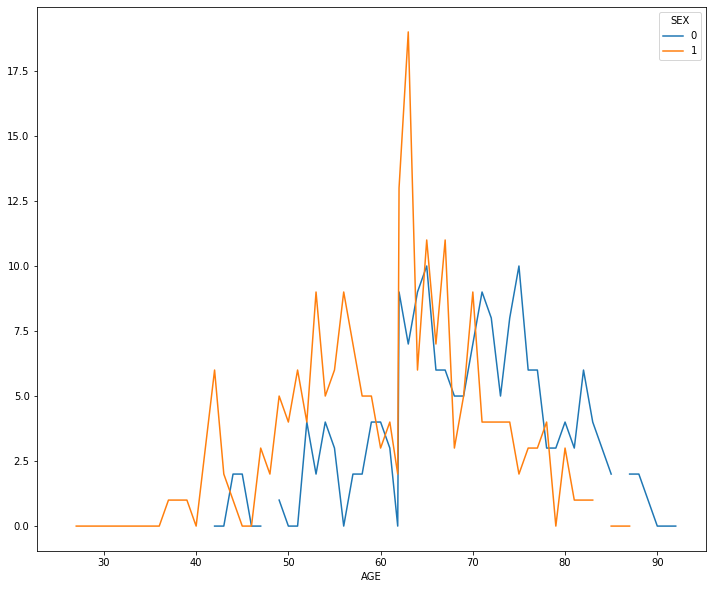

In [31]:
CHD = pd.crosstab(index = df['AGE'], columns = df['SEX'], values=df['ZSN'], aggfunc=np.count_nonzero)
CHD.plot(figsize = (12,10))

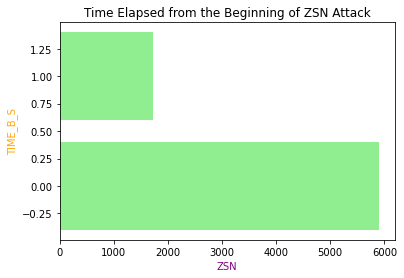

In [32]:
df_v = df.copy()
df_vis = df_v.groupby('ZSN')['TIME_B_S'].sum().to_frame().reset_index()
#Creating the column plot 
plt.barh(df_vis['ZSN'],df_vis['TIME_B_S'], color= 'lightgreen') 
#Adding the aesthetics
plt.title('Time Elapsed from the Beginning of ZSN Attack')
plt.xlabel('ZSN', color= 'purple')
plt.ylabel('TIME_B_S', color='orange') 
#Show the plot
plt.show()

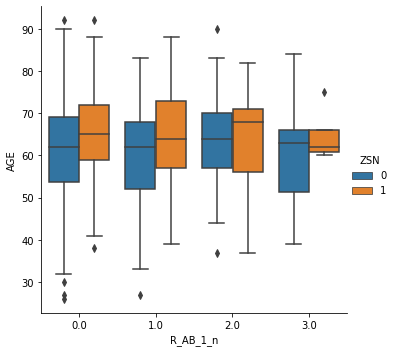

In [33]:
sns.catplot(x="R_AB_1_n", y="AGE", hue="ZSN", kind="box", data=df)

# MACHINE LEARNING MODEL

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

# TRAIN THE TEST DATA

In [35]:
# create a new data frame
data = df.copy()

# splitting the data to training and testing
y = data['ZSN']
x = data.drop(['ZSN'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [36]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# SMOTEC-NC IMBALANCE

In [37]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42, categorical_features=[0])
X_res, y_res = sm.fit_resample(X_train, y_train)

In [39]:
print(y_res.shape)
y_res.value_counts()

(2108,)


0    1054
1    1054
Name: ZSN, dtype: int64

# LOGISTIC REGRESSION

In [40]:
model = LogisticRegression()
# train model
model.fit(X_res, y_res)
train_acc = model.score(X_res, y_res)
print("The Training Accuracy is {}".format(train_acc*100))

The Training Accuracy is 60.05692599620494


In [41]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.55      0.65       252
           1       0.30      0.56      0.39        88

    accuracy                           0.55       340
   macro avg       0.54      0.55      0.52       340
weighted avg       0.66      0.55      0.58       340



# RANDOM FOREST CLASSIFIER

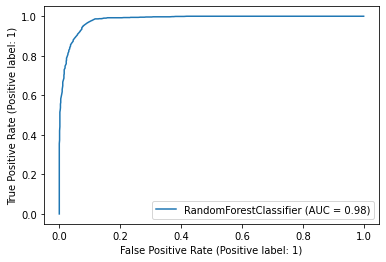

In [43]:
model = RandomForestClassifier(n_estimators=60)
model.fit(X_res,y_res)
metrics.plot_roc_curve(model, X_res, y_res) 

plt.show()

In [44]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       252
           1       0.30      0.33      0.32        88

    accuracy                           0.63       340
   macro avg       0.53      0.53      0.53       340
weighted avg       0.64      0.63      0.63       340



No handles with labels found to put in legend.


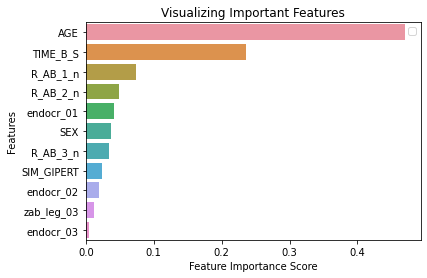

<Figure size 2160x2160 with 0 Axes>

In [46]:
feature_imp = pd.Series(model.feature_importances_,index=X_res.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.figure(figsize=(30,30))
plt.show()

# NAIVE BAYES CLASSIFIER

In [47]:
model = GaussianNB()
model.fit(X_res, y_res)

GaussianNB()

In [48]:
y_pred  =  model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [49]:
cmt = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)
print('Confusion matrix: ', cmt)
print('Accuracy: ', acc)

Confusion matrix:  [[ 46 206]
 [ 16  72]]
Accuracy:  0.34705882352941175


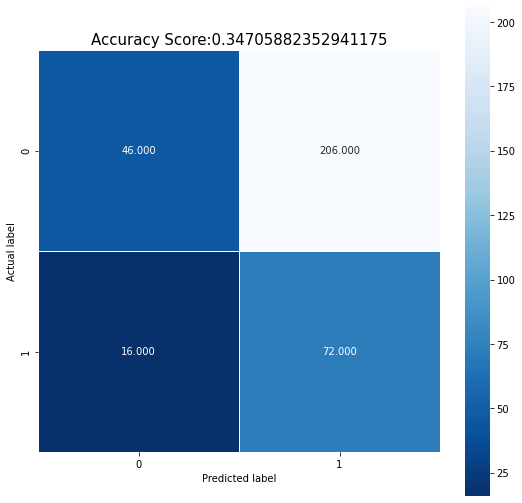

In [50]:
plt.figure(figsize=(9,9))
sns.heatmap(cmt, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
df = 'Accuracy Score:{0}'.format(acc)
plt.title(df, size = 15);

In [51]:
print(classification_report(y_res, y_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1054
           1       1.00      1.00      1.00      1054

    accuracy                           1.00      2108
   macro avg       1.00      1.00      1.00      2108
weighted avg       1.00      1.00      1.00      2108



# GRADIENT BOOSTING CLASSIFIER

In [52]:
model = GradientBoostingClassifier(learning_rate=0.1)
model.fit(X_res,y_res)

GradientBoostingClassifier()

In [53]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [54]:
print("Accuracy score (training): {0:.3f}".format(model.score(X_res, y_res)))
print("Accuracy score (Testing): {0:.3f}".format(model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy score (training): 0.717
Accuracy score (Testing): 0.594
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       252
           1       0.30      0.43      0.36        88

    accuracy                           0.59       340
   macro avg       0.53      0.54      0.53       340
weighted avg       0.65      0.59      0.61       340



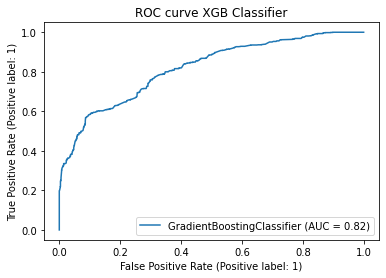

In [55]:
metrics.plot_roc_curve(model, X_res, y_res) 
plt.title("ROC curve XGB Classifier")
plt.show()

# DECISION TREE CLASSIFIER

In [56]:
model = DecisionTreeClassifier()
model = model.fit(X_res,y_res)

In [57]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy score (training): {0:.3f}".format(model.score(X_res, y_res)))
print("Accuracy score (Testing): {0:.3f}".format(model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.6029411764705882
Accuracy score (training): 0.937
Accuracy score (Testing): 0.603
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       252
           1       0.27      0.31      0.29        88

    accuracy                           0.60       340
   macro avg       0.51      0.51      0.51       340
weighted avg       0.62      0.60      0.61       340

